# **Machine Learning aplicado ao Dataset Câncer de Mama**
Use o Dataset Breast Cancer Wisconsin que contém informações clínicas de pacientes e indica a presença ou ausência de câncer de mama.

Baixe o arquivo data.csv neste link:

(https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)

Construa modelos de classificação dos tipos SVM, Árvore de Decisão, Floresta Aleatória e XGBoost, capazes de prever o diagnóstico de câncer de mama com base nas variáveis clínicas disponíveis.

Faça os 7 Passos do Machine Learning e comente o código.

Dataset Breast Cancer Wisconsin Original
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst

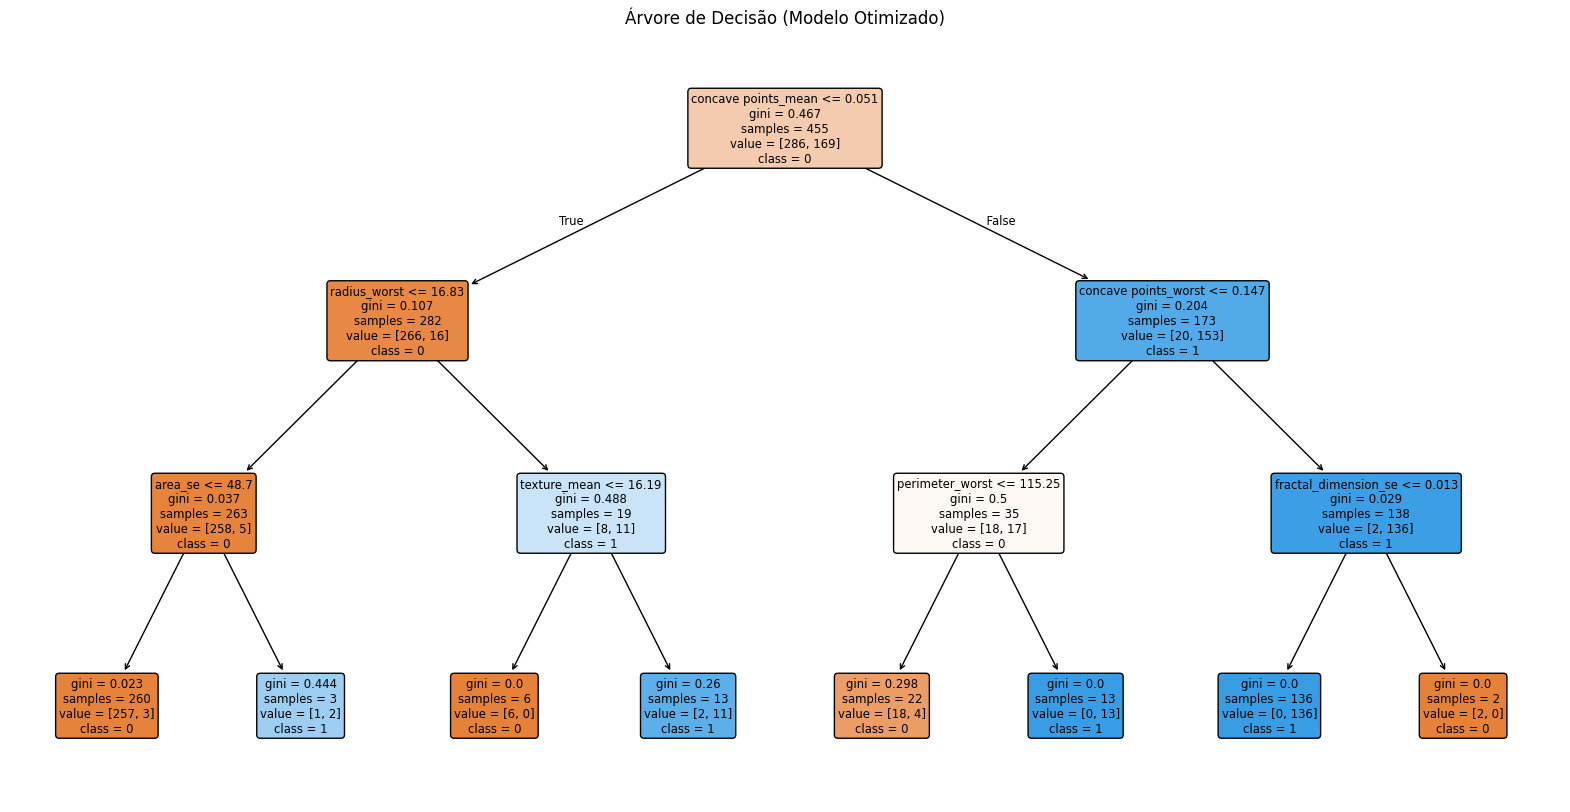

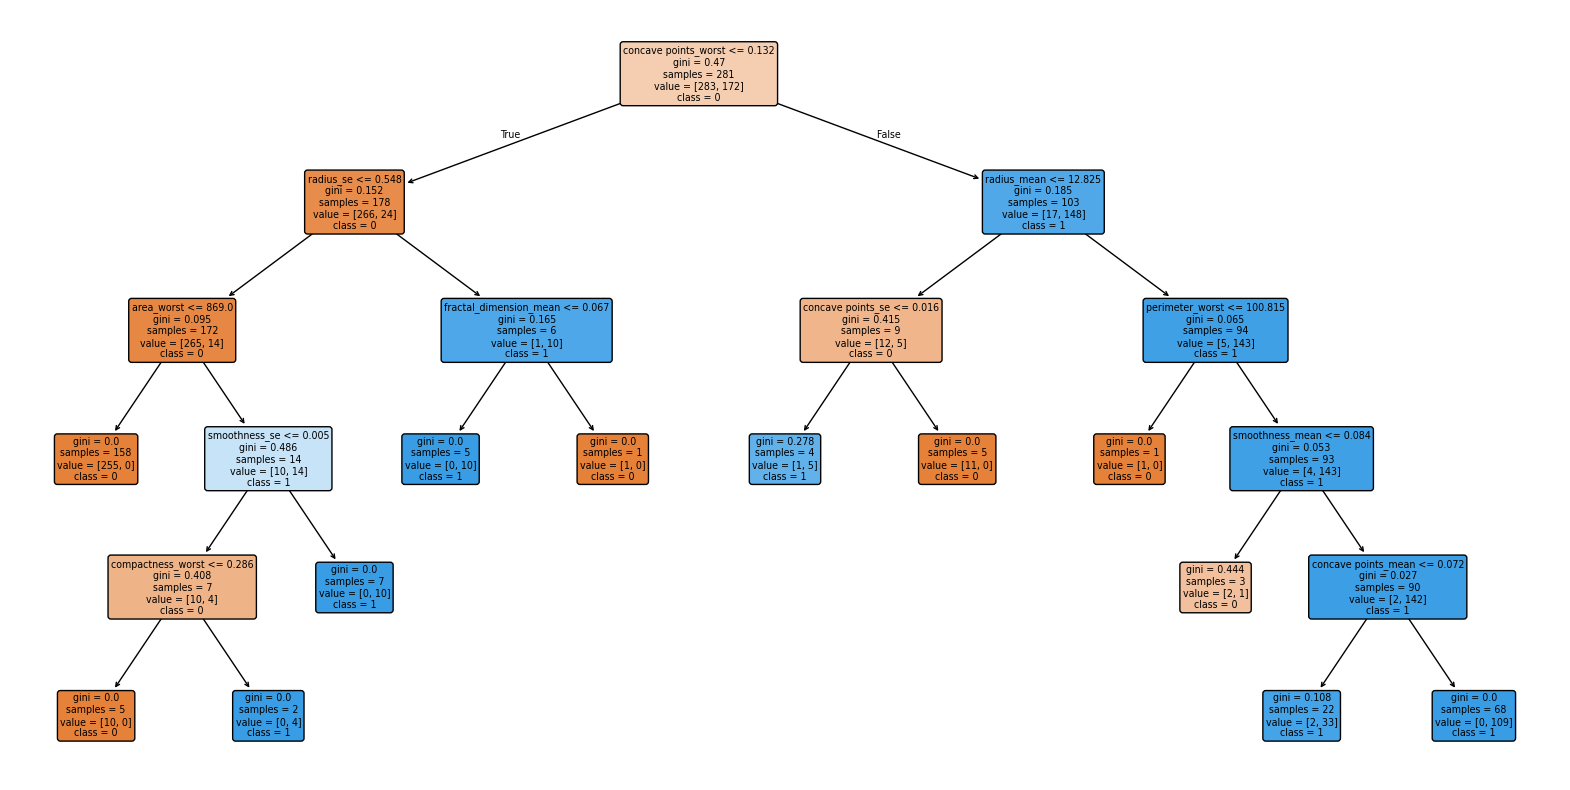

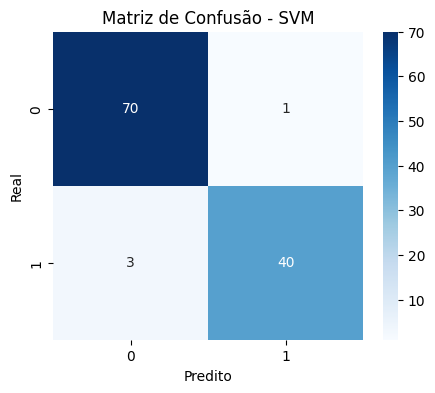

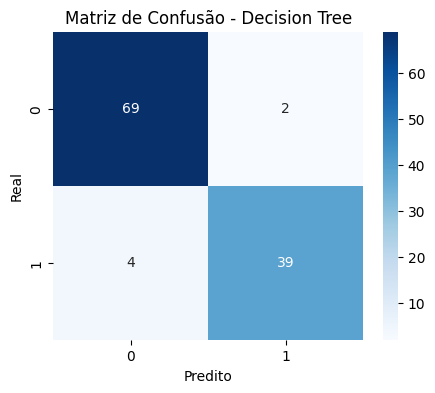

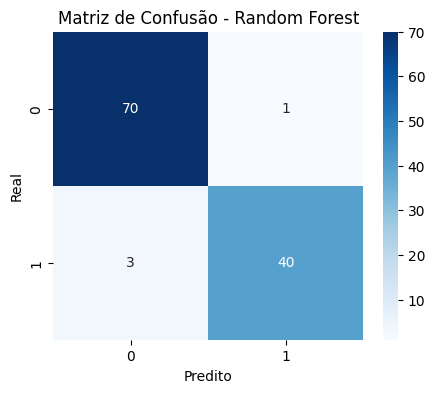

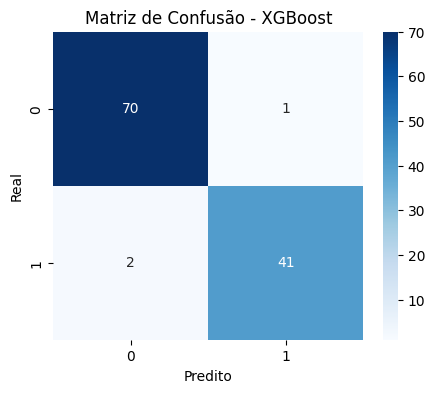

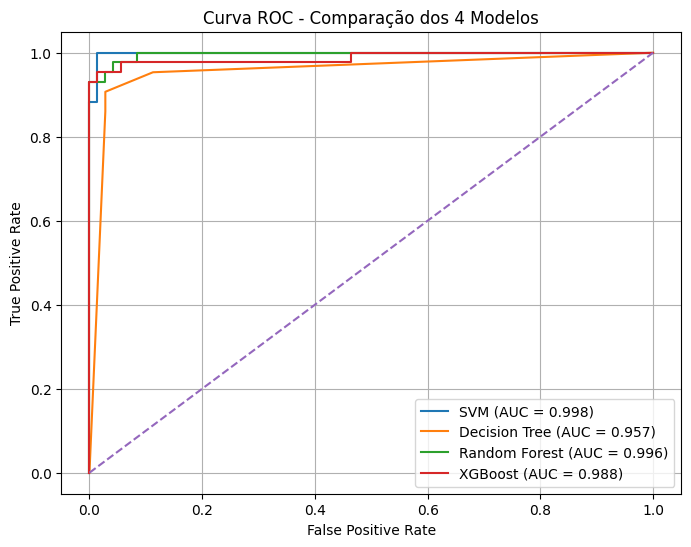

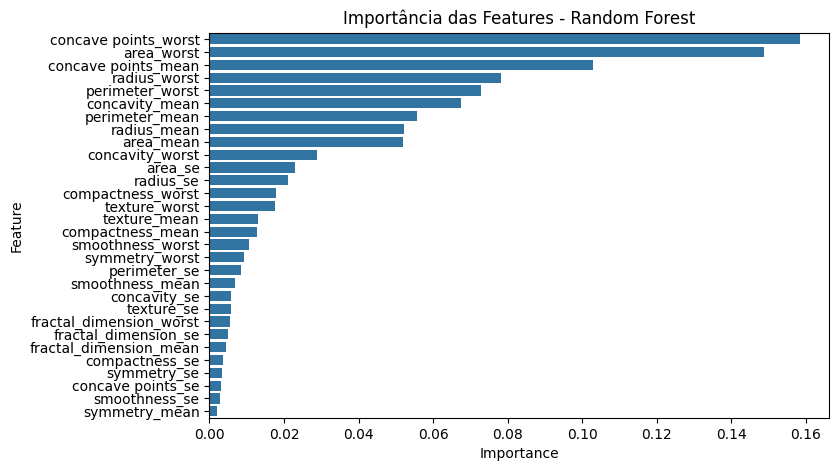

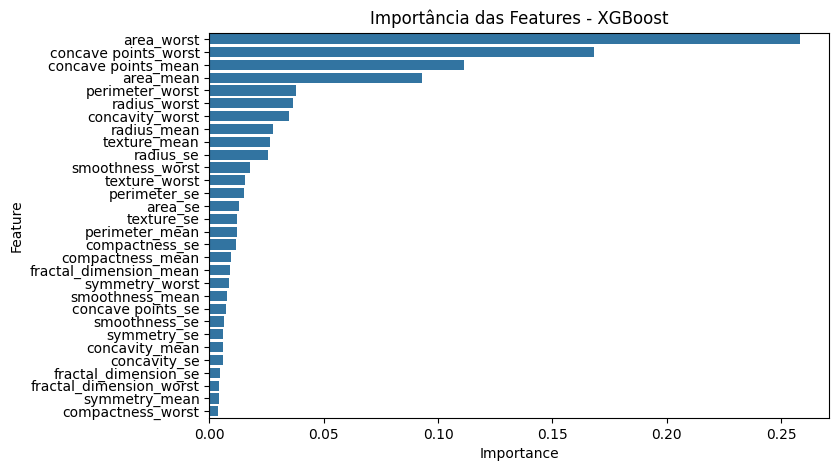

In [ ]:
# ================================
# 0. Importar Bibliotecas
# ================================

# Manipulação e análise de dados
import pandas as pd
import numpy as np

# Divisão dos dados e criação do modelo
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import plot_tree

# Avaliação de desempenho
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

# Visualização (opcional)
import matplotlib.pyplot as plt
import seaborn as sns

# ================================
# 1. Carregar Dataset
# ================================
df = pd.read_csv('data.csv')           # Baixa a planilha diabetes do Dataset Pima

print('=========================================')
print('Dataset Breast Cancer Wisconsin Original')
print('=========================================')
print(df.head(), '\n')                              # Exibe os 5 primeiros registros da planilha

# ====================================
# 2. Separar Features e Target (X, y)
# ====================================
X = df.drop('diagnosis', axis=1)    # Todas as 20 colunas da planilha, exceto coluna Target y
y = df['diagnosis']                 # 1 coluna de Target y

# ================================
# 3. Pré-Processamento dos Dados
# ================================
# Aqui trata NaN, converte variáveis categóricas em numéricas, e remove colunas desnecessárias, tudo antes da divisão treino e teste para evitar erros

# A) Converte dados categóricos em numéricos no atributo target 'diagnosis' (de M/B para 0/1)
y = y.map({'M': 1, 'B': 0})   # Como era binário M/B, só deu um novo valor binário M = 1 e B = 0 para evitar a complexidade do One Hot Encoder

# B) Remove colunas desnecessárias 'id' e 'Unnamed: 32' antes da divisão treino e teste
X = X.drop(['id', 'Unnamed: 32'], axis=1)   # Cortou as 2 colunas do dataframe X, e armazenou o novo resultado na variável X

print('==============================================')
print('Dataset Breast Cancer com Dados Normalizados')
print('==============================================')
print(X.head(), '\n')      # Exibe os 5 primeiros registros da planilha

# ================================
# 4. Dividir em Treino e Teste
# ================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   # train_test_split() é o método que divide o dataset em treino e teste
# Dataset foi dividido em: 80% Treino e 20% Teste

# ================================
# 5. Criar Modelos
# ================================
svm = SVC(kernel='linear', C=1.0, probability=True, random_state=42)
dtree = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimator define o número de árvores da floresta
xgb = XGBClassifier(random_state=42)

# ================================
# 6. Otimizar Modelos
# ================================
# A) Definir StratifiedKFold da Validação Cruzada (cv será útil no RandomizedSearch)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# B) Definir Parâmetros dos Modelos
svm_params = {
    'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']
}

dtree_params = {
    'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10]
}

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# C) Otimizar Parâmetros dos Modelos com RandomizedSearchCV
svm_search = RandomizedSearchCV(svm, svm_params, n_iter=3, cv=5, random_state=42)
dtree_search = RandomizedSearchCV(dtree, dtree_params, n_iter=3, cv=5, random_state=42)
rf_search = RandomizedSearchCV(rf, rf_params, n_iter=3, cv=5, random_state=42)
xgb_search = RandomizedSearchCV(xgb, xgb_params, n_iter=3, cv=5, random_state=42)

# ==============================================
# 7. Treinar Modelos com Parâmetros Otimizados
# ==============================================
svm_search.fit(X_train, y_train)     # fit(X_train, y_train) é o método de treino
dtree_search.fit(X_train, y_train)
rf_search.fit(X_train, y_train)
xgb_search.fit(X_train, y_train)

# ==============================================
# 8. Obter Modelos Otimizados
# ==============================================
svm_best = svm_search.best_estimator_       # best_estimator_ é o método que busca o melhor modelo
dtree_best = dtree_search.best_estimator_   # e armazena em svm_best
rf_best = rf_search.best_estimator_
xgb_best = xgb_search.best_estimator_

# ==============================================
# 9. Fazer Previsões com Modelos Otimizados
# ==============================================
y_pred_svm = svm_best.predict(X_test)         # Previsões (y_pred) feitas a partir dos dados de X_test
y_pred_dtree = dtree_best.predict(X_test)     # predict(X_test) é o método que faz previsões
y_pred_rf = rf_best.predict(X_test)
y_pred_xgb = xgb_best.predict(X_test)

# ===============================================
# 10. Avaliar Desempenho dos Modelos com Métricas
# ===============================================
accuracy_svm = accuracy_score(y_test, y_pred_svm)         # Regra: metrica_score(y_test, y_pred_modelo)
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)   # Exemplo: accuracy_score(y_test, y_pred_svm)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

precision_svm = precision_score(y_test, y_pred_svm)
precision_dtree = precision_score(y_test, y_pred_dtree)
precision_rf = precision_score(y_test, y_pred_rf)
precision_xgb = precision_score(y_test, y_pred_xgb)

recall_svm = recall_score(y_test, y_pred_svm)
recall_dtree = recall_score(y_test, y_pred_dtree)
recall_rf = recall_score(y_test, y_pred_rf)
recall_xgb = recall_score(y_test, y_pred_xgb)

f1_svm = f1_score(y_test, y_pred_svm)
f1_dtree = f1_score(y_test, y_pred_dtree)
f1_rf = f1_score(y_test, y_pred_rf)
f1_xgb = f1_score(y_test, y_pred_xgb)

# ==========================================================
# 11. Criar Dataframe para Comparar Desempenhos dos Modelos
# ==========================================================
resultados = pd.DataFrame({
    'Modelo': ['SVM', 'Decision Tree', 'Random Forest', 'XGBoost'],              # tabela = pd.DataFrame({ "Modelo" : ["SVM", "Decision Tree", "Random Forest"] })
    'Acurácia': [accuracy_svm, accuracy_dtree, accuracy_rf, accuracy_xgb],       # Assim que se cria Dataframe. Para cada coluna, use Key : [Value]. Ex: "Modelo" : [SVM].
    'Precisão': [precision_svm, precision_dtree, precision_rf, precision_xgb],
    'Recall': [recall_svm, recall_dtree, recall_rf, recall_xgb],
    'F1-Score': [f1_svm, f1_dtree, f1_rf, f1_xgb]
})
print('========================================')
print('COMPARAÇÃO DE DESEMPENHO DOS MODELOS')
print('========================================')
print(resultados)

# ===========================================================
# 12. Criar Gráficos para Visualizar Resultados dos Modelos
# ===========================================================
print('\n=========================================================================================')
print('GRÁFICOS: Matriz de Confusão, Curva ROC, Importância das Featuress, Gráficos de Árvores')
print('=========================================================================================')

# GRÁFICO 1: Árvore de Decisão
plt.figure(figsize=(20,10))
plot_tree(
    dtree_best,               # Melhor modelo de árvore obtido
    feature_names=X.columns,
    class_names=["0","1"],
    filled=True,
    rounded=True
)
plt.title("Árvore de Decisão (Modelo Otimizado)")
plt.show()

# GRÁFICO 2: Primeira Árvore da Floresta de Decisão
plt.figure(figsize=(20,10))
plot_tree(
    rf_best.estimators_[0],    # Melhor modelo de floresta obtido na 1a árvore (índice 0)
    feature_names=X.columns,
    class_names=["0","1"],
    filled=True,
    rounded=True,
)

# GRÁFICO 3: Matriz de Confusão
def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de Confusão - {model_name}")
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.show()

# Plotando para os 4 modelos
plot_conf_matrix(y_test, y_pred_svm, "SVM")
plot_conf_matrix(y_test, y_pred_dtree, "Decision Tree")
plot_conf_matrix(y_test, y_pred_rf, "Random Forest")
plot_conf_matrix(y_test, y_pred_xgb, "XGBoost")

# GRÁFICO 4: Curva ROC dos 4 Modelos Juntas
plt.figure(figsize=(8, 6))

# === SVM ===
fpr, tpr, _ = roc_curve(y_test, svm_best.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f"SVM (AUC = {auc(fpr, tpr):.3f})")

# === Decision Tree ===
fpr, tpr, _ = roc_curve(y_test, dtree_best.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {auc(fpr, tpr):.3f})")

# === Random Forest ===
fpr, tpr, _ = roc_curve(y_test, rf_best.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc(fpr, tpr):.3f})")

# === XGBoost ===
fpr, tpr, _ = roc_curve(y_test, xgb_best.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {auc(fpr, tpr):.3f})")

# Linha de referência (modelo aleatório)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title("Curva ROC - Comparação dos 4 Modelos")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

# GRÁFICO 5: Importância das Features - Random Forest
rf_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_best.feature_importances_
}).sort_values("Importance", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=rf_importances)
plt.title("Importância das Features - Random Forest")
plt.show()


# GRÁFICO 6: Importância das Features - XGBoost
xgb_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": xgb_best.feature_importances_
}).sort_values("Importance", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=xgb_importances)
plt.title("Importância das Features - XGBoost")
plt.show()